In [2]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 import
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import random

print(tf.__version__)

2.2.0


In [4]:
class_names = os.listdir("../../feature/feature_fbank/")
class_names.sort()

print(class_names)

['2017019740001_kwakjuheon', '2017019740002_kimjiho', '2017019740003_songyejin', '2017019740004_parksohui', '2017019740005_moonyeonwoo', '2017019740006_kangsubin', '2017019740007_leekyeongeun', '2017019740008_chochaeyeon', '2017019740009_shindonghwan', '2017019740010_kwakmirae', '2017019740011_kimhyeryeong', '2017019740012_chaeminjoon', '2017019740013_kwakyiheon', '2017019740014_leesumin', '2017019740015_choihayoung', '2017019740016_kangyeseo', '2017019740017_kwakmihyang', '2017019740018_eundano', '2017019740019_limjinju', '2017019740020_kimseongje', '2017019740021_kwakbokyeong', '2017019740022_ahnhyojin', '2017019740023_heosehun', '2017019740024_choijiwon', '2017019740025_ahnjeongsuk', '2017019740026_parkyeongseon', '2017019740027_kwaksangpil', '2017019740028_kodohyeon', '2017019740029_limdonggeun', '2017019740030_kanghyeyeon', '2017019740031_jominseok', '2017019770001_kwonyuna', '2017019770002_kwoneunkyung', '2017019770003_johaesu', '2017019770004_leebyeongjin', '2017019770005_hyeons

In [5]:
x_list = []
y_list = []

for i in range(0,len(class_names)):
    files=os.listdir("../../feature/feature_fbank/"+class_names[i])
    files = [file for file in files if file.endswith(".npy")]
    print(class_names[i].split('_')[0])

    for j in range(0, len(files)):
        print(files[j], j)
        x = np.load("../../feature/feature_fbank/"+class_names[i]+"/"+files[j])
        x_list.append(x)
        y_list.append(i)
print(type(x))
print(y_list)
# print(x_list)

2017019740001
2017019740001_kwakjuheon_4.npy 0
2017019740001_kwakjuheon_1.npy 1
2017019740001_kwakjuheon_0.npy 2
2017019740001_kwakjuheon_2.npy 3
2017019740001_kwakjuheon_3.npy 4
2017019740002
2017019740002_kimjiho_3.npy 0
2017019740002_kimjiho_1.npy 1
2017019740002_kimjiho_2.npy 2
2017019740002_kimjiho_4.npy 3
2017019740002_kimjiho_0.npy 4
2017019740003
2017019740003_songyejin_2.npy 0
2017019740003_songyejin_3.npy 1
2017019740003_songyejin_4.npy 2
2017019740003_songyejin_1.npy 3
2017019740003_songyejin_0.npy 4
2017019740004
2017019740004_parksohui_2.npy 0
2017019740004_parksohui_1.npy 1
2017019740004_parksohui_3.npy 2
2017019740004_parksohui_0.npy 3
2017019740004_parksohui_4.npy 4
2017019740005
2017019740005_moonyeonwoo_3.npy 0
2017019740005_moonyeonwoo_2.npy 1
2017019740005_moonyeonwoo_0.npy 2
2017019740005_moonyeonwoo_4.npy 3
2017019740005_moonyeonwoo_1.npy 4
2017019740006
2017019740006_kangsubin_3.npy 0
2017019740006_kangsubin_1.npy 1
2017019740006_kangsubin_4.npy 2
2017019740006_k

2017019770020_nomyungok_1.npy 1
2017019770020_nomyungok_0.npy 2
2017019770020_nomyungok_2.npy 3
2017019770020_nomyungok_3.npy 4
2017019770021
2017019770021_heoyoonjung_4.npy 0
2017019770021_heoyoonjung_2.npy 1
2017019770021_heoyoonjung_3.npy 2
2017019770021_heoyoonjung_1.npy 3
2017019770021_heoyoonjung_0.npy 4
2017019770022
2017019770022_heojaemin_4.npy 0
2017019770022_heojaemin_1.npy 1
2017019770022_heojaemin_2.npy 2
2017019770022_heojaemin_0.npy 3
2017019770022_heojaemin_3.npy 4
2017019770023
2017019770023_kimsoyung_4.npy 0
2017019770023_kimsoyung_0.npy 1
2017019770023_kimsoyung_1.npy 2
2017019770023_kimsoyung_2.npy 3
2017019770023_kimsoyung_3.npy 4
2017019770024
2017019770024_chuminha_0.npy 0
2017019770024_chuminha_4.npy 1
2017019770024_chuminha_2.npy 2
2017019770024_chuminha_3.npy 3
2017019770024_chuminha_1.npy 4
2017019770025
2017019770025_kimhyeonsu_1.npy 0
2017019770025_kimhyeonsu_2.npy 1
2017019770025_kimhyeonsu_4.npy 2
2017019770025_kimhyeonsu_0.npy 3
2017019770025_kimhyeonsu_

2017019880026_parkjongsang_3.npy 4
2017019880027
2017019880027_leesol_3.npy 0
2017019880027_leesol_2.npy 1
2017019880027_leesol_0.npy 2
2017019880027_leesol_1.npy 3
2017019880027_leesol_4.npy 4
2017019880028
2017019880028_kimsunghan_3.npy 0
2017019880028_kimsunghan_0.npy 1
2017019880028_kimsunghan_2.npy 2
2017019880028_kimsunghan_1.npy 3
2017019880028_kimsunghan_4.npy 4
2017019880029
2017019880029_kimminji_4.npy 0
2017019880029_kimminji_1.npy 1
2017019880029_kimminji_3.npy 2
2017019880029_kimminji_0.npy 3
2017019880029_kimminji_2.npy 4
2017019880030
2017019880030_hanseungoh_2.npy 0
2017019880030_hanseungoh_1.npy 1
2017019880030_hanseungoh_3.npy 2
2017019880030_hanseungoh_4.npy 3
2017019880030_hanseungoh_0.npy 4
2017019880031
2017019880031_ahnjiwoo_4.npy 0
2017019880031_ahnjiwoo_2.npy 1
2017019880031_ahnjiwoo_1.npy 2
2017019880031_ahnjiwoo_3.npy 3
2017019880031_ahnjiwoo_0.npy 4
2017019880032
2017019880032_seoyeonjoo_1.npy 0
2017019880032_seoyeonjoo_0.npy 1
2017019880032_seoyeonjoo_3.npy

In [6]:
x_train = np.array(x_list)
y_train = np.array(y_list)

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

x_train: (576, 128, 438)
y_train: (576,)


In [7]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val.shape)

x_train: (460, 128, 438)
y_train: (460,)
x_val: (116, 128, 438)
y_val: (116,)


In [8]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [9]:
x_train = x_train.reshape(-1, x_train.shape[1], x_train.shape[2], 1)
x_val   = x_val.reshape(-1, x_val.shape[1], x_val.shape[2], 1)

In [10]:
print("x_train:", x_train.shape)
print("y_train:", y_train_encoded.shape)
print("x_val:", x_val.shape)
print("y_val:", y_val_encoded.shape)

x_train: (460, 128, 438, 1)
y_train: (460, 115)
x_val: (116, 128, 438, 1)
y_val: (116, 115)


In [11]:
print(np.min(x_train), np.max(x_train))
x_train = x_train - np.min(x_train)

print(np.min(x_train), np.max(x_train))
x_train = x_train / np.max(x_train)

print(np.min(x_train), np.max(x_train))

print(np.min(x_val), np.max(x_val))
x_val = x_val - np.min(x_val)

print(np.min(x_val), np.max(x_val))
x_val = x_val / np.max(x_val)

print(np.min(x_val), np.max(x_val))

-100.0 47.48948
0.0 147.48947
0.0 1.0
-100.0 45.654686
0.0 145.6547
0.0 1.0


In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization
from tensorflow.keras.layers import Dropout, Activation

In [13]:
conv2 = tf.keras.Sequential()

conv2.add(Conv2D(32, (2, 2), activation="relu", padding="same", input_shape=(x_train.shape[1], x_train.shape[2], 1) ,kernel_initializer='glorot_uniform'))
conv2.add(Conv2D(32, (3, 3), activation="relu", padding="same", kernel_initializer='glorot_uniform'))
# conv2.add(MaxPooling2D((2,2)))
conv2.add(Dropout(0.5))

conv2.add(Conv2D(64, (3, 3), activation="relu", padding="same",kernel_initializer='glorot_uniform'))
# conv2.add(Conv2D(64, (3, 3), activation="relu", padding="same",kernel_initializer='glorot_uniform'))
# conv2.add(MaxPooling2D((2,2)))
conv2.add(Dropout(0.5))

# conv2.add(Conv2D(32, (5, 5), activation="relu", padding="same",kernel_initializer='glorot_uniform'))
# conv2.add(Conv2D(32, (7, 7), activation="relu", padding="same",kernel_initializer='glorot_uniform'))
# conv2.add(MaxPooling2D((2,2)))
# conv2.add(Dropout(0.5))

# conv2.add(Conv2D(32,(3, 3), activation="relu", padding="same",kernel_initializer='glorot_uniform'))
# conv2.add(Conv2D(32,(3, 3), activation="relu", padding="same",kernel_initializer='glorot_uniform'))
# conv2.add(MaxPooling2D((2,2)))
# conv2.add(Dropout(0.5))

# conv2.add(Conv2D(64, (2, 2), activation="relu", padding="same",kernel_initializer='glorot_uniform'))
# conv2.add(Conv2D(64, (2, 2), activation="relu", padding="same",kernel_initializer='glorot_uniform'))
# conv2.add(MaxPooling2D((2,2)))
# conv2.add(Dropout(0.5))


conv2.add(Flatten())
# conv2.add(Dropout(0.5))

# conv2.add(Dense(32, activation="relu",kernel_initializer='glorot_uniform'))
# conv2.add(Dense(64, activation="relu",kernel_initializer='glorot_uniform'))
# conv2.add(Dense(128, activation="relu",kernel_initializer='glorot_uniform'))
conv2.add(Dense(y_train_encoded.shape[1], activation="softmax"))

In [14]:
conv2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 438, 32)      160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 438, 32)      9248      
_________________________________________________________________
dropout (Dropout)            (None, 128, 438, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 438, 64)      18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 438, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 3588096)           0         
_________________________________________________________________
dense (Dense)                (None, 115)               4

In [15]:
conv2.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=["accuracy"])

In [16]:
history = conv2.fit(x_train, y_train_encoded, epochs=300, verbose=1, validation_data=(x_val, y_val_encoded))

Epoch 1/300
15/15 [==============================] - 79s 5s/step - loss: 33.4938 - accuracy: 0.0065 - val_loss: 4.7448 - val_accuracy: 0.0172
Epoch 2/300
15/15 [==============================] - 79s 5s/step - loss: 4.7849 - accuracy: 0.0022 - val_loss: 4.7449 - val_accuracy: 0.0086
Epoch 3/300
15/15 [==============================] - 80s 5s/step - loss: 4.7492 - accuracy: 0.0152 - val_loss: 4.7449 - val_accuracy: 0.0086
Epoch 4/300
15/15 [==============================] - 74s 5s/step - loss: 4.7438 - accuracy: 0.0087 - val_loss: 4.7449 - val_accuracy: 0.0086
Epoch 5/300
15/15 [==============================] - 79s 5s/step - loss: 4.7436 - accuracy: 0.0130 - val_loss: 4.7449 - val_accuracy: 0.0086
Epoch 6/300
15/15 [==============================] - 76s 5s/step - loss: 4.7434 - accuracy: 0.0130 - val_loss: 4.7442 - val_accuracy: 0.0259
Epoch 7/300
15/15 [==============================] - 78s 5s/step - loss: 4.7411 - accuracy: 0.0043 - val_loss: 4.7387 - val_accuracy: 0.0086
Epoch 8/300


Epoch 59/300
15/15 [==============================] - 47s 3s/step - loss: 0.0469 - accuracy: 0.9913 - val_loss: 2.4806 - val_accuracy: 0.4224
Epoch 60/300
15/15 [==============================] - 46s 3s/step - loss: 0.0212 - accuracy: 0.9935 - val_loss: 2.6820 - val_accuracy: 0.3621
Epoch 61/300
15/15 [==============================] - 47s 3s/step - loss: 0.0142 - accuracy: 0.9935 - val_loss: 2.2595 - val_accuracy: 0.4052
Epoch 62/300
15/15 [==============================] - 47s 3s/step - loss: 0.0105 - accuracy: 0.9913 - val_loss: 2.3343 - val_accuracy: 0.4052
Epoch 63/300
15/15 [==============================] - 47s 3s/step - loss: 0.0218 - accuracy: 0.9870 - val_loss: 2.4916 - val_accuracy: 0.3707
Epoch 64/300
15/15 [==============================] - 47s 3s/step - loss: 0.0214 - accuracy: 0.9891 - val_loss: 2.5701 - val_accuracy: 0.3621
Epoch 65/300
15/15 [==============================] - 47s 3s/step - loss: 0.0119 - accuracy: 0.9935 - val_loss: 2.3397 - val_accuracy: 0.4310
Epoch 

15/15 [==============================] - 47s 3s/step - loss: 0.0122 - accuracy: 0.9913 - val_loss: 2.2368 - val_accuracy: 0.4569
Epoch 117/300
15/15 [==============================] - 46s 3s/step - loss: 0.0145 - accuracy: 0.9935 - val_loss: 2.0628 - val_accuracy: 0.4655
Epoch 118/300
15/15 [==============================] - 47s 3s/step - loss: 0.0117 - accuracy: 0.9935 - val_loss: 2.1678 - val_accuracy: 0.4655
Epoch 119/300
15/15 [==============================] - 47s 3s/step - loss: 0.0121 - accuracy: 0.9913 - val_loss: 1.9521 - val_accuracy: 0.5000
Epoch 120/300
15/15 [==============================] - 47s 3s/step - loss: 0.0138 - accuracy: 0.9891 - val_loss: 2.1942 - val_accuracy: 0.4741
Epoch 121/300
15/15 [==============================] - 47s 3s/step - loss: 0.0144 - accuracy: 0.9891 - val_loss: 1.9636 - val_accuracy: 0.5172
Epoch 122/300
15/15 [==============================] - 47s 3s/step - loss: 0.0081 - accuracy: 0.9957 - val_loss: 1.7603 - val_accuracy: 0.5345
Epoch 123/300

15/15 [==============================] - 47s 3s/step - loss: 0.0110 - accuracy: 0.9913 - val_loss: 1.6425 - val_accuracy: 0.5776
Epoch 174/300
15/15 [==============================] - 46s 3s/step - loss: 0.0167 - accuracy: 0.9870 - val_loss: 1.9388 - val_accuracy: 0.5517
Epoch 175/300
15/15 [==============================] - 47s 3s/step - loss: 0.0135 - accuracy: 0.9870 - val_loss: 1.6985 - val_accuracy: 0.5690
Epoch 176/300
15/15 [==============================] - 47s 3s/step - loss: 0.0087 - accuracy: 0.9957 - val_loss: 1.7202 - val_accuracy: 0.5345
Epoch 177/300
15/15 [==============================] - 47s 3s/step - loss: 0.0138 - accuracy: 0.9870 - val_loss: 1.7503 - val_accuracy: 0.5690
Epoch 178/300
15/15 [==============================] - 47s 3s/step - loss: 0.0115 - accuracy: 0.9913 - val_loss: 2.1306 - val_accuracy: 0.4914
Epoch 179/300
15/15 [==============================] - 47s 3s/step - loss: 0.0109 - accuracy: 0.9935 - val_loss: 1.7147 - val_accuracy: 0.5345
Epoch 180/300

15/15 [==============================] - 47s 3s/step - loss: 0.0129 - accuracy: 0.9913 - val_loss: 3.0679 - val_accuracy: 0.3276
Epoch 231/300
15/15 [==============================] - 47s 3s/step - loss: 0.0138 - accuracy: 0.9913 - val_loss: 3.1148 - val_accuracy: 0.3276
Epoch 232/300
15/15 [==============================] - 47s 3s/step - loss: 0.0118 - accuracy: 0.9913 - val_loss: 3.1817 - val_accuracy: 0.3276
Epoch 233/300
15/15 [==============================] - 46s 3s/step - loss: 0.0058 - accuracy: 0.9978 - val_loss: 3.0841 - val_accuracy: 0.3276
Epoch 234/300
15/15 [==============================] - 47s 3s/step - loss: 0.0097 - accuracy: 0.9935 - val_loss: 3.0368 - val_accuracy: 0.3276
Epoch 235/300
15/15 [==============================] - 47s 3s/step - loss: 0.0083 - accuracy: 0.9957 - val_loss: 2.8506 - val_accuracy: 0.3534
Epoch 236/300
15/15 [==============================] - 47s 3s/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 2.6933 - val_accuracy: 0.3966
Epoch 237/300

15/15 [==============================] - 47s 3s/step - loss: 0.0125 - accuracy: 0.9935 - val_loss: 2.8218 - val_accuracy: 0.3621
Epoch 288/300
15/15 [==============================] - 47s 3s/step - loss: 0.0177 - accuracy: 0.9891 - val_loss: 2.5520 - val_accuracy: 0.4483
Epoch 289/300
15/15 [==============================] - 47s 3s/step - loss: 0.0118 - accuracy: 0.9957 - val_loss: 3.0017 - val_accuracy: 0.3621
Epoch 290/300
15/15 [==============================] - 47s 3s/step - loss: 0.0167 - accuracy: 0.9891 - val_loss: 3.1873 - val_accuracy: 0.3362
Epoch 291/300
15/15 [==============================] - 47s 3s/step - loss: 0.0094 - accuracy: 0.9957 - val_loss: 2.8037 - val_accuracy: 0.3879
Epoch 292/300
15/15 [==============================] - 46s 3s/step - loss: 0.0143 - accuracy: 0.9913 - val_loss: 2.8353 - val_accuracy: 0.4052
Epoch 293/300
15/15 [==============================] - 47s 3s/step - loss: 0.0110 - accuracy: 0.9913 - val_loss: 3.0246 - val_accuracy: 0.3793
Epoch 294/300

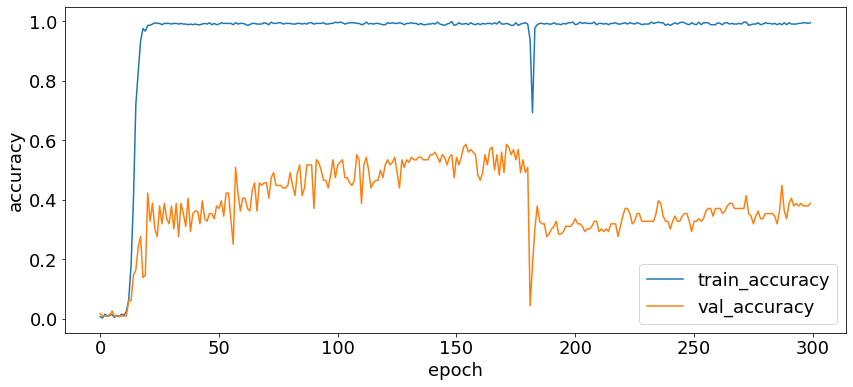

In [17]:
plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_accuracy", "val_accuracy"])
plt.show()

In [18]:
x_validation_list=[]
y_validation_list=[]

val_class_names = os.listdir("../../feature/feature_fbank_validation/")
val_class_names.sort()

for i in range(0,len(val_class_names)):
    val_files=os.listdir("../../feature/feature_fbank_validation/"+val_class_names[i])
    val_files = [file for file in val_files if file.endswith(".npy")]

    for j in range(0, len(val_files)):
        x = np.load("../../feature/feature_fbank_validation/"+val_class_names[i]+"/"+val_files[j])
       
        x_validation_list.append(x)
        y_validation_list.append(i)


# print(y_val_list)

x_validation = np.array(x_validation_list)
y_validation = np.array(y_validation_list)
y_validation_encoded = tf.keras.utils.to_categorical(y_validation)

x_validation = x_validation.reshape(-1, x_validation.shape[1], x_validation.shape[2], 1)

x_validation = x_validation - np.min(x_validation)
x_validation = x_validation / np.max(x_validation)
for k in range(0, len(x_validation)):
    
    kt = x_validation[k].reshape(-1, x_validation.shape[1], x_validation.shape[2], 1)
    predictions_single = conv2.predict(kt)
    print("Predict :",class_names[np.argmax(predictions_single)].split('_')[1]+str(","), \
          "Real :",val_class_names[y_validation[k]].split('_')[1])
    print()

Predict : hyeonsanghyeok, Real : kwakjuheon

Predict : kwakjuheon, Real : kwakjuheon

Predict : kwakjuheon, Real : kwakjuheon

Predict : kwakjuheon, Real : kwakjuheon

Predict : kwakjuheon, Real : kwakjuheon

Predict : kwonyuna, Real : kwonyuna

Predict : kwonyuna, Real : kwonyuna

Predict : kwonyuna, Real : kwonyuna

Predict : kwonyuna, Real : kwonyuna

Predict : kwonyuna, Real : kwonyuna

Predict : kimsubin, Real : kimsubin

Predict : yuminji, Real : kimsubin

Predict : yuminji, Real : kimsubin

Predict : limjinju, Real : kimsubin

Predict : yuminji, Real : kimsubin

